# Precision

The data served by the PSM3 API has limited numerical precision, and that precision varies by variable.  Many variables, including the various irradiance quantities, are limited to integer precision.  Some variables have one, two, or four digits after the decimal point.  Additionally, for variables served by multiple endpoints (e.g. GHI is available at both hourly and 5-minute endpoints), the precision does not change between endpoints.

Note that some ostensibly numerical variables are actually categorical (e.g. `fill_flag` and `cloud_type`); this notebook excludes those and considers only "true" numerical variables.

In [1]:
import pvlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# PSM3 API request parameter cases
cases = {
    'TMY': {
        'attributes': [
            'dhi', 'dni', 'ghi', 'dew_point', 'air_temperature',
            'surface_pressure', 'wind_direction', 'wind_speed', 'surface_albedo'
        ],
        'names': 'tmy',
        'interval': 60,
    },
    'Hourly': {
        'attributes': [
            'air_temperature', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi',
            'dew_point', 'dhi', 'dni', 'ghi', 'ghuv-280-400', 'ghuv-295-385',
            'relative_humidity', 'solar_zenith_angle', 'surface_albedo',
            'surface_pressure', 'total_precipitable_water', 'wind_direction',
            'wind_speed'
        ],
        'names': 2020,
        'interval': 60,
    },
    '5-min': {
        'attributes': [
            'ghi', 'dhi', 'dni', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi',
            'air_temperature', 'wind_speed', 'wind_direction', 'surface_pressure',
            'dew_point', 'relative_humidity', 'total_precipitable_water',
            'solar_zenith_angle', 'surface_albedo'
        ],
        'names': 2020,
        'interval': 5,
    }
}

In [3]:
precisions = pd.DataFrame()

for label, kwargs in cases.items():
    df, meta = pvlib.iotools.get_psm3(40, -80, 'DEMO_KEY', 'assessingsolar@gmail.com',
                                      map_variables=False, leap_day=True, **kwargs)
    df = df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

    for column in df:
        step = min(np.diff(sorted(np.unique(df[column]))))
        precisions.loc[column, label] = step


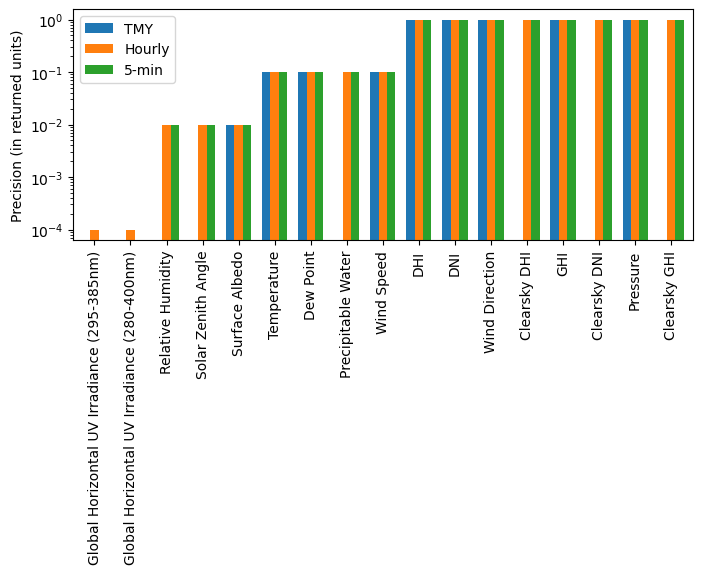

In [4]:
precisions.sort_values('Hourly').plot.bar(logy=True, figsize=(8, 3), width=0.7)
plt.ylabel('Precision (in returned units)');

In [5]:
%load_ext watermark
%watermark --iversions -u -d -t

Last updated: 2023-01-30 21:35:35

matplotlib: 3.5.2
numpy     : 1.22.3
pandas    : 1.5.0
pvlib     : 0.9.3

